<a href="https://colab.research.google.com/github/Satyabrata117/Yes-Bank-Stock-Closing-Price-Predictor/blob/main/Yes_Bank_Stock_Closing_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -**Satyabrata Sahoo

# **Project Summary -**

Predicting the closing price of Yes Bank stock through regression means using past data to create a model that can estimate future stock prices. Regression analysis is a statistical technique that uses various factors to predict the value of a specific variable, like the stock price in this case.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The challenge in building a Yes Bank stock closing price prediction machine learning model is to make a model that is precise and dependable in forecasting. The aim is to offer investors a tool that aids them in making well-informed choices about Yes Bank stocks. To achieve this, the model needs to be trained on a portion of past data and tested on another portion to guarantee it can reliably forecast future stock prices. The ultimate goal is to develop a strong and accurate model that empowers investors to make wise decisions and optimize their returns on investments in Yes Bank stocks.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

import datetime

### Dataset Loading

In [ ]:
# Load Dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Project data/Yes Bank Stock Closing Price Prediction/data_YesBank_StockPrices.csv")

### Dataset First View

In [ ]:
# Dataset First Look
data

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data.shape

(185, 5)

### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
180    False
181    False
182    False
183    False
184    False
Length: 185, dtype: bool

In [ ]:
len(data[data.duplicated()])

0

In [ ]:
#so there is no duplicated values

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Vallues
data.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

Text(0.5, 1.0, 'MISSING VALUES')

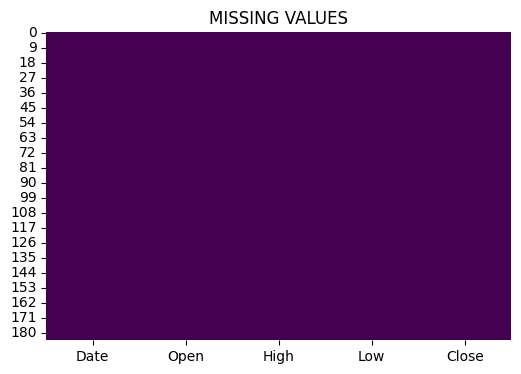

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(6, 4))
sns.heatmap(data.isnull(), cbar=False , cmap='viridis')
plt.title('MISSING VALUES')


### What did you know about your dataset?

As per the analysis provided, the dataset includes 5 columns and 185 rows. Only one column is in the float format, while the rest are formatted as dates. Importantly, there are no missing values (Null values) or duplicate rows in this dataset.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Dataset Describe
data.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

The dataset includes five important variables: "Date," which combines the month and year; "Open," indicating the stock's starting price for the month; "High," representing the highest stock price during the month; "Low," reflecting the lowest stock price in the month; and "Close," the closing price at the end of the month. These variables collectively offer a snapshot of the stock's performance, from its initial, highest, and lowest points to its closing valuation. The date provides a temporal context, and the open, high, low, and close values give a comprehensive view of the stock's behavior over time. This dataset lays the groundwork for analysis and modeling to uncover patterns and insights in stock market trends.Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
unique_dates = data['Date'].unique()
unique_open = data['Open'].unique()
unique_high = data['High'].unique()
unique_low = data['Low'].unique()
unique_close = data['Close'].unique()


print("Unique Dates:", unique_dates)
print("Unique Open values:", unique_open)
print("Unique High values:", unique_high)
print("Unique Low values:", unique_low)
print("Unique Close values:", unique_close)

Unique Dates: ['Jul-05' 'Aug-05' 'Sep-05' 'Oct-05' 'Nov-05' 'Dec-05' 'Jan-06' 'Feb-06'
 'Mar-06' 'Apr-06' 'May-06' 'Jun-06' 'Jul-06' 'Aug-06' 'Sep-06' 'Oct-06'
 'Nov-06' 'Dec-06' 'Jan-07' 'Feb-07' 'Mar-07' 'Apr-07' 'May-07' 'Jun-07'
 'Jul-07' 'Aug-07' 'Sep-07' 'Oct-07' 'Nov-07' 'Dec-07' 'Jan-08' 'Feb-08'
 'Mar-08' 'Apr-08' 'May-08' 'Jun-08' 'Jul-08' 'Aug-08' 'Sep-08' 'Oct-08'
 'Nov-08' 'Dec-08' 'Jan-09' 'Feb-09' 'Mar-09' 'Apr-09' 'May-09' 'Jun-09'
 'Jul-09' 'Aug-09' 'Sep-09' 'Oct-09' 'Nov-09' 'Dec-09' 'Jan-10' 'Feb-10'
 'Mar-10' 'Apr-10' 'May-10' 'Jun-10' 'Jul-10' 'Aug-10' 'Sep-10' 'Oct-10'
 'Nov-10' 'Dec-10' 'Jan-11' 'Feb-11' 'Mar-11' 'Apr-11' 'May-11' 'Jun-11'
 'Jul-11' 'Aug-11' 'Sep-11' 'Oct-11' 'Nov-11' 'Dec-11' 'Jan-12' 'Feb-12'
 'Mar-12' 'Apr-12' 'May-12' 'Jun-12' 'Jul-12' 'Aug-12' 'Sep-12' 'Oct-12'
 'Nov-12' 'Dec-12' 'Jan-13' 'Feb-13' 'Mar-13' 'Apr-13' 'May-13' 'Jun-13'
 'Jul-13' 'Aug-13' 'Sep-13' 'Oct-13' 'Nov-13' 'Dec-13' 'Jan-14' 'Feb-14'
 'Mar-14' 'Apr-14' 'May-14' 'Jun-14' 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Converting Date column from object format to Date
data["Date"]=pd.to_datetime(data["Date"],format='%b-%y')

In [ ]:
data['Date']

0     2005-07-01
1     2005-08-01
2     2005-09-01
3     2005-10-01
4     2005-11-01
         ...    
180   2020-07-01
181   2020-08-01
182   2020-09-01
183   2020-10-01
184   2020-11-01
Name: Date, Length: 185, dtype: datetime64[ns]

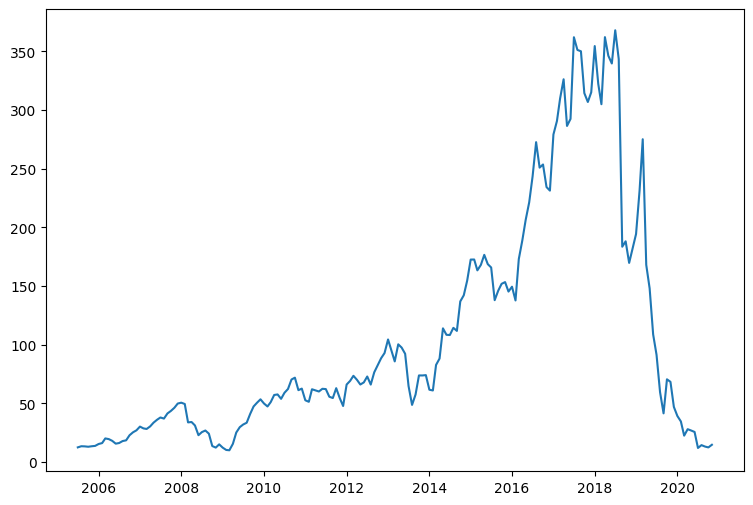

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(data['Date'],data['Close'])

In [ ]:
# Taking a Numerical Feature from Data
numeric_fea=data.describe().columns
numeric_fea

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

### What all manipulations have you done and insights you found?

Converted Date column to Date Format by using Datetime Library. To get better visualisation about Date and Closing price of Stock.Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<Axes: xlabel='Close', ylabel='Density'>

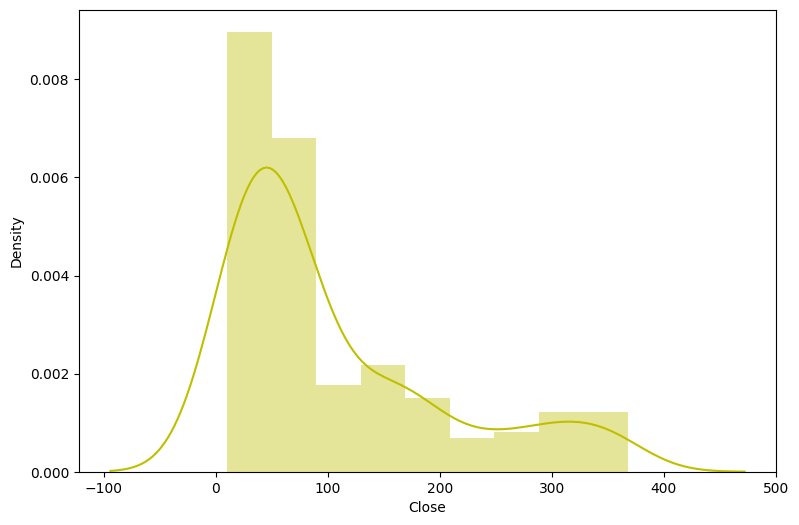

In [ ]:
# Chart - 1 visualization code
# Doing Visualisation of Distributed Data for Close column.
plt.figure(figsize=(9,6))
sns.distplot(data['Close'],color='y')

Text(0.5, 1.0, 'Distribution of Close Prices')

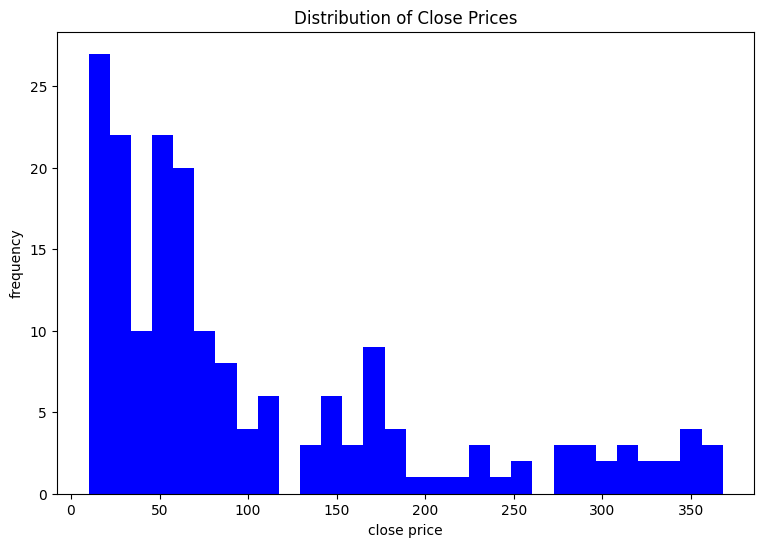

In [ ]:
plt.figure(figsize = (9 , 6))
plt.hist(data['Close'] , color = 'b' ,bins = 30)
plt.xlabel('close price')
plt.ylabel('frequency')
plt.title('Distribution of Close Prices')


<Axes: xlabel='Close', ylabel='Density'>

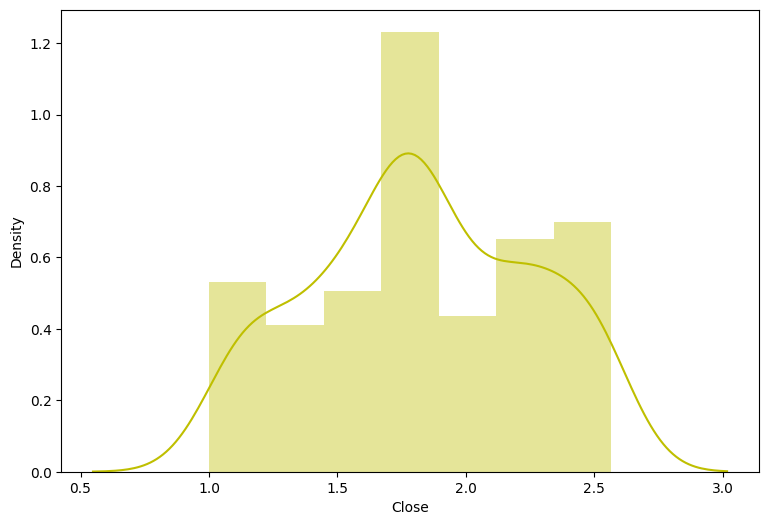

In [ ]:
# Normalizing the close column data by using log transformation.
plt.figure(figsize=(9,6))
sns.distplot(np.log10(data["Close"]),color='y')

##### 1. Why did you pick the specific chart?

In a Yes Bank stock closing price prediction ML model, examining a distribution plot of the target variable (closing price) can offer valuable insights into how it is spread out, its shape, and the presence of any outliers.

By visually representing the distribution of the closing price, we can better understand its central tendencies (mean, median, and mode), how it spreads out (range, variance, and standard deviation), and whether it shows any skewness (symmetry or asymmetry). Additionally, this helps in identifying any potential outliers.

This information is crucial for choosing the right ML algorithm to predict the closing price and for pinpointing any issues with the data, such as non-normality or extreme values, that might need attention before training the model.

##### 2. What is/are the insight(s) found from the chart?

In a Yes Bank stock closing price prediction ML model, analyzing a distribution plot of the target variable (closing price) reveals several insights:

1.Shape of the distribution: The distribution shape appears to be skewed right, indicating a positive skewness. This means that the closing prices are more concentrated on one side of the mean. To improve the model, it might be beneficial to apply log transformation to make the target variable more symmetrically distributed.

2.Presence of outliers: Outliers are data points that significantly differ from the majority of the data. By examining the distribution plot, we can detect potential outliers. Addressing these outliers before training the model is important for ensuring the model's accuracy and reliability.







##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

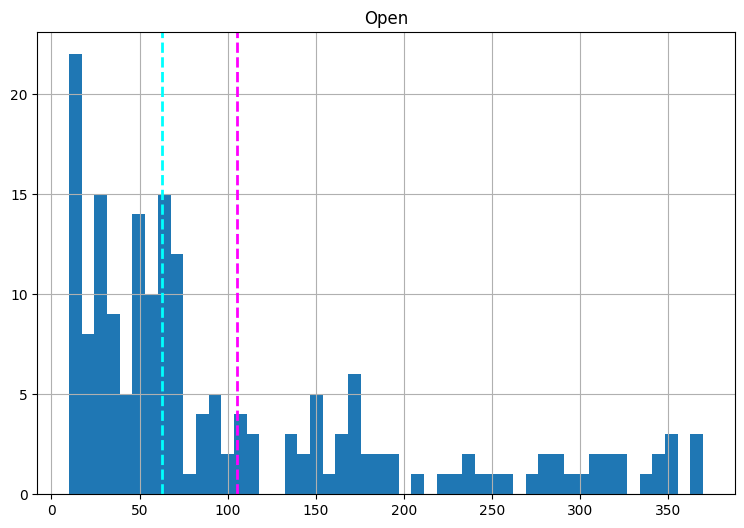

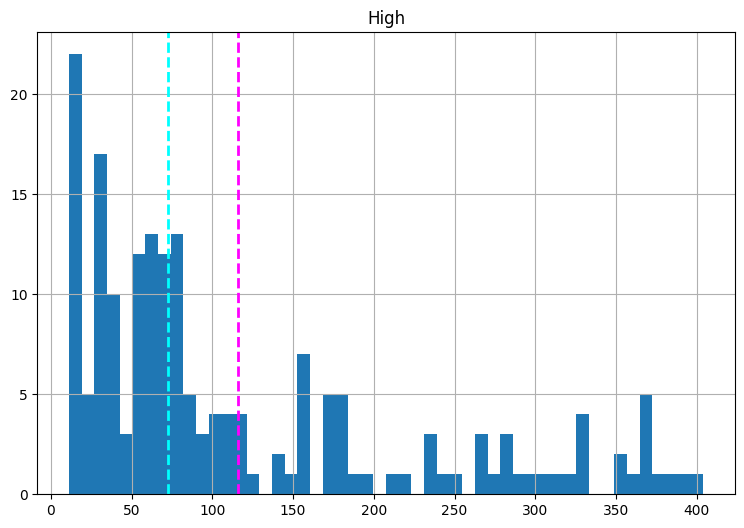

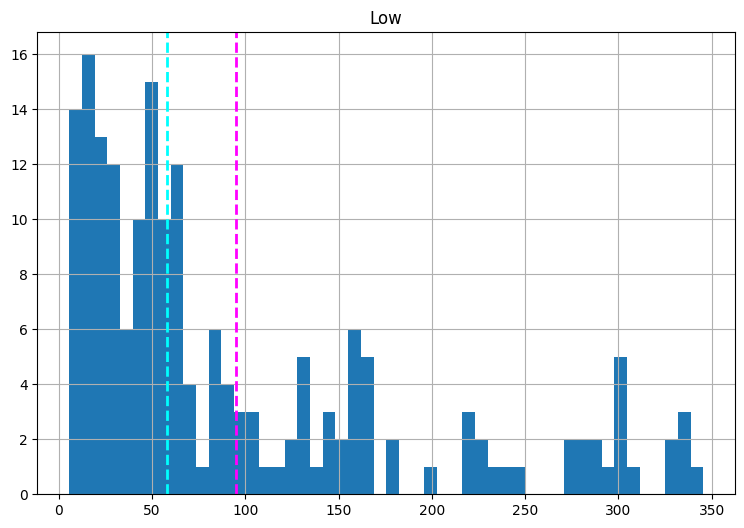

In [ ]:
# Chart - 2 visualization code
# Plotting Histogram for each independent column in Data.
for col in numeric_fea[:-1]:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature=data[col]
  feature.hist(bins=50,ax=ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

Histograms are usually used to show the pattern of one variable. However, in predicting Yes Bank stock closing prices, we can also use histograms to see how other factors (independent variables) are spread out. Adding mean and median lines helps us understand if the data is evenly spread or if it leans more to one side, which is important for making our predictions accurate.

##### 2. What is/are the insight(s) found from the chart?

The shape of the distribution of independent variables skewed right. This information can help to determine the appropriate statistical approach for regression.

#### Chart - 3

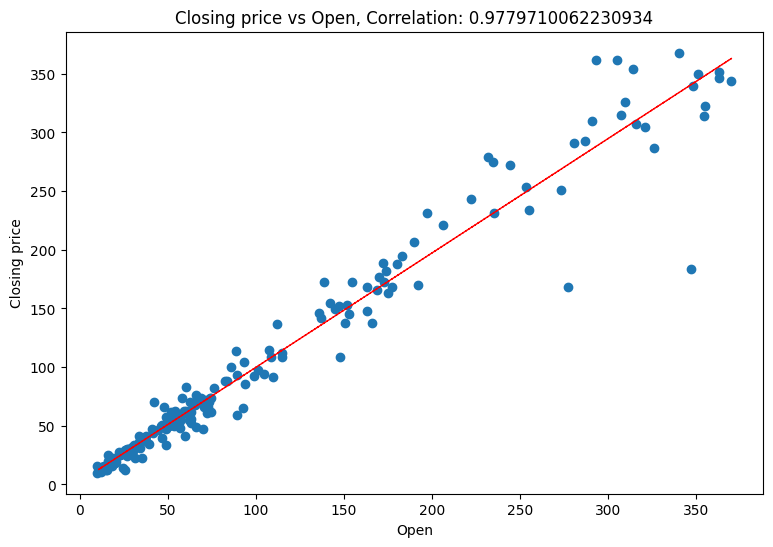

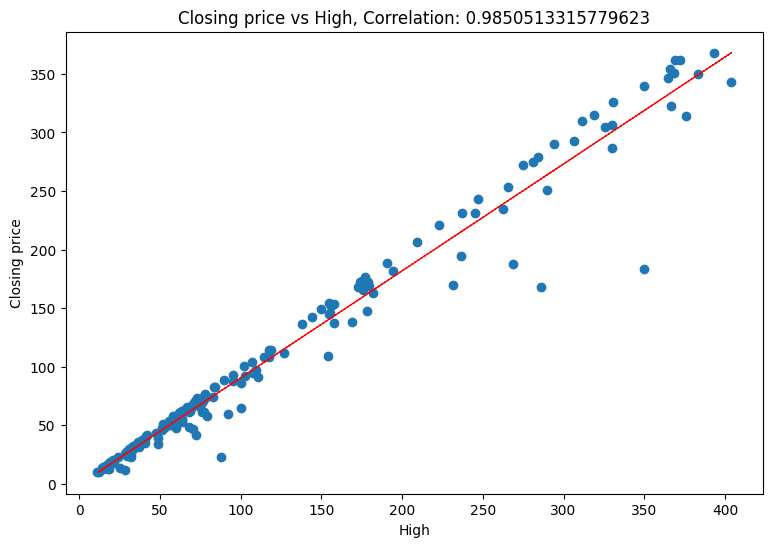

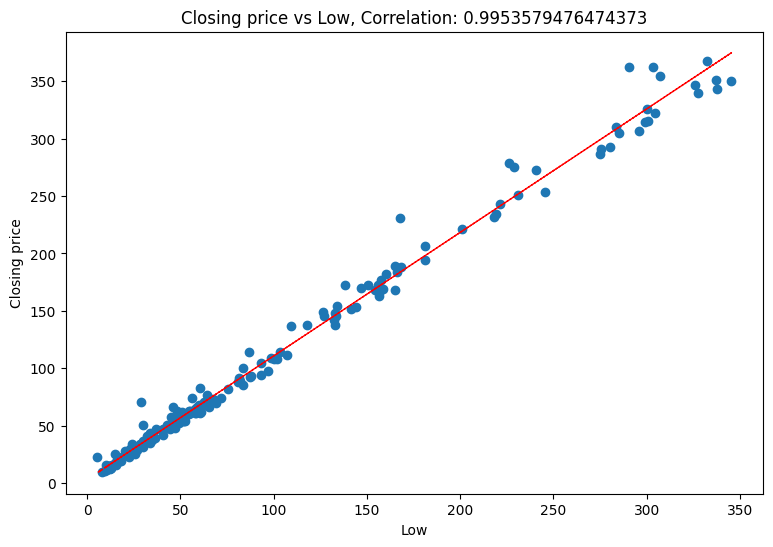

In [ ]:
# Chart - 3 visualization code
# Plotting graph Independent variable vs Dependent variable to check Multicollinearity.
for col in numeric_fea[:-1]:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature=data[col]
  label=data["Close"]
  correlation=feature.corr(label)
  plt.scatter(x=feature,y=label)
  plt.ylabel("Closing price")
  plt.xlabel(col)
  ax.set_title('Closing price vs '+col+', Correlation: '+str(correlation))
  z=np.polyfit(data[col],data['Close'],1)
  y_hat=np.poly1d(z)(data[col])

  plt.plot(data[col],y_hat,"r--",lw=1)

plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is a handy way to explore the connection between the Yes Bank stock closing price (dependent variable) and other factors (independent variables). Each data point is shown on the graph, with the independent variable on the x-axis and the closing price on the y-axis.

Analyzing the scatter plot helps us spot any patterns or relationships between the variables. If the points form a tight cluster around a straight line, it suggests a strong linear relationship. If the points are more scattered and don't form a straight line, it indicates a weaker or no relationship.

This visual inspection helps us decide if there's a strong or weak, linear or nonlinear connection between the closing price and the independent variable(s). This insight guides the choice of suitable ML algorithms for prediction and helps identify any potential data issues before training the ML model.

##### 2. What is/are the insight(s) found from the chart?

From all above graphs we can see that all the independent variable are linearly corelated with dependent variable(i.e., Yes Bank stock closing price). We need to choose appropriate model to deal with multicollinearity in our data.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

<Axes: >

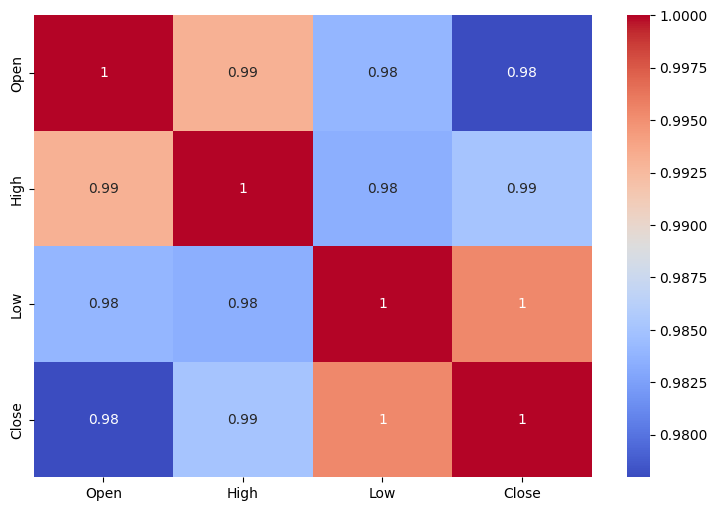

In [ ]:
# Chart - 4 visualization code
# Heatmap to see collinearity between columns
plt.figure(figsize=(9,6))
cor=data.corr()
sns.heatmap(abs(cor),annot=True,cmap='coolwarm')

##### 1. Why did you pick the specific chart?

Heatmap can be used to explore the correlation between the closing price and the independent variables. By examining the heatmap, we can identify any patterns or relationships between the variables, which can inform the selection of appropriate ML algorithms for predicting the closing price.

A heatmap can also be used to identify any potential issues with the data, such as multicollinearity (i.e., high correlation between independent variables).

##### 2. What is/are the insight(s) found from the chart?

As from above chart we can see that our data is Multicollinear. Multicollinearity can cause problems for some ML algorithms, such as linear regression, because it can lead to overfitting and unreliable coefficient estimates. By identifying variables with high correlations, we can decide whether to remove one of the variables or to use a different ML algorithm that is less sensitive to multicollinearity.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 6. Data Scaling

In [ ]:
# Scaling your data
# Scaling your data
data_pr=data.copy() # Making of our original data
# Separate out Dependent and Independent variable
X=np.log10(data_pr.iloc[:,1:-1]) # Normalizing the data using log transformation
y=np.log10(data_pr['Close']) # Normalizing the data using log transformation


## Which method have you used to scale you data and why?


---
We use log transformation to scale data. Because this method applies a logarithmic transformation to the data, which can help normalize skewed data and reduce the impact of outliers.


### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Split your data to train and test. Choose Splitting ratio wisely.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)

(148, 3)
(37, 3)


##### What data splitting ratio have you used and why?

Data splitting is a widely used technique in machine learning and data analysis to assess how well a model performs on new, unseen data. In our case, we applied an 80-20 split.

In an 80:20 split, the dataset is divided into two parts: a training set and a testing set. The training set consists of 80% of the data, and the testing set contains the remaining 20%. This split is common when dealing with large datasets, especially when training the model requires a significant amount of time. The model is trained on the training set, and its performance is then evaluated on the testing set to ensure it generalizes well to new data. This approach helps us understand how well the model is likely to perform in real-world scenarios.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
reg=LinearRegression()
# Fit the Algorithm
reg.fit(X_train,y_train)
# Predict on the model
y_pred=reg.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
mse=mean_squared_error(10**(y_test),10**(y_pred)) #10** to convert back log10 that we used while making it normalised
rmse=np.sqrt(mse)

r2=r2_score(10**(y_test),10**(y_pred))
Adjusted_R2=(1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)

In [ ]:
eval=pd.DataFrame([mse,rmse,r2,Adjusted_R2,mae],columns=['Linear'],index=['MSE','RMSE','R2','Adj R2','MAE'])
eval


,Linear
MSE,70.420406
RMSE,8.391687
R2,0.993744
Adj R2,0.993175
MAE,0.017328


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Here we use GridSearchCV for optimization. GridSearchCV is more likely to find the optimal set of hyperparameters if the search space is small enough, as it performs an exhaustive search.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

By looking at above Dataframe we can say that our linear regression with lasso regularization is doing better compare to all others.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
from sklearn.linear_model import Lasso
# ML Model - 1 Implementation
lasso=Lasso(alpha=0.1)

# Fit the Algorithm
lasso.fit(X_train,y_train)

# Predict on the model
y_pred_l=lasso.predict(X_test)


In [ ]:
# Visualizing evaluation Metric Score chart
mse_l=mean_squared_error(10**(y_test),10**(y_pred_l)) #10** to convert back log10 that we used while making it normalised
rmse_l=np.sqrt(mse_l)

r2_l=r2_score(10**(y_test),10**(y_pred_l))
Adjusted_R2_l=(1-(1-r2_score(10**(y_test), 10**(y_pred_l)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

mae_l = mean_absolute_error(y_test, y_pred_l)


In [ ]:
eval_l=pd.DataFrame([mse_l,rmse_l,r2,Adjusted_R2_l,mae_l],columns=['Lasso'],index=['MSE','RMSE','R2','Adj R2','MAE'])
eval=pd.concat([eval,eval_l],axis=1)
eval

,Linear,Lasso
MSE,70.420406,8552.042521
RMSE,8.391687,92.477254
R2,0.993744,0.993744
Adj R2,0.993175,0.171146
MAE,0.017328,0.220050


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
# Fit the Algorithm
lasso_regressor.fit(X_train, y_train)

# Predict on the model
y_pred_lcv=lasso_regressor.predict(X_test)

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-05}

Using  {'alpha': 1e-05}  the negative mean squared error is:  -0.001303609483074943


In [ ]:
mse_lcv=mean_squared_error(10**(y_test),10**(y_pred_lcv)) #10** to convert back log10 that we used while making it normalised
rmse_lcv=np.sqrt(mse_lcv)

r2_lcv=r2_score(10**(y_test),10**(y_pred_lcv))
Adjusted_R2_lcv=(1-(1-r2_score(10**(y_test), 10**(y_pred_lcv)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

mae_lcv = mean_absolute_error(y_test, y_pred_lcv)

In [ ]:
eval_lcv=pd.DataFrame([mse_lcv,rmse_lcv,r2_lcv,Adjusted_R2_lcv,mae_lcv],columns=['Lasso CV'],index=['MSE','RMSE','R2','Adj R2','MAE'])
eval=pd.concat([eval,eval_lcv],axis=1)

eval

,Linear,Lasso,Lasso CV
MSE,70.420406,8552.042521,70.224612
RMSE,8.391687,92.477254,8.380013
R2,0.993744,0.993744,0.993761
Adj R2,0.993175,0.171146,0.993194
MAE,0.017328,0.220050,0.017386


##### Which hyperparameter optimization technique have you used and why?

Here we use GridSearchCV for optimization. GridSearchCV is more likely to find the optimal set of hyperparameters if the search space is small enough, as it performs an exhaustive search.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

By looking at above Dataframe we can say that our linear regression with Ridge regularization is doing better compare to all others.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.8)
# Fit the Algorithm
elasticnet.fit(X_train,y_train)
# Predict on the model
y_pred_e=elasticnet.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
mse_e=mean_squared_error(10**(y_test),10**(y_pred_e))
#10** to convert back log10 that we used while making it normalised
rmse_e=np.sqrt(mse_e)

r2_e=r2_score(10**(y_test),10**(y_pred_e))
Adjusted_R2_e=1-(1-r2_score(10**(y_test), 10**(y_pred_e)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

mae_e= mean_absolute_error(y_test, y_pred_e)

eval_e=pd.DataFrame([mse_e,rmse_e,r2_e,Adjusted_R2_e,mae_e],columns=['Elastic'],index=['MSE','RMSE','R2','Adj R2','MAE'])

eval=pd.concat([eval,eval_e],axis=1)

In [ ]:
eval

,Linear,Lasso,Lasso CV,Elastic
MSE,70.420406,8552.042521,70.224612,7069.422528
RMSE,8.391687,92.477254,8.380013,84.079858
R2,0.993744,0.993744,0.993761,0.371936
Adj R2,0.993175,0.171146,0.993194,0.314840
MAE,0.017328,0.220050,0.017386,0.189681


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
# Fit the Algorithm
elastic_regressor.fit(X_train, y_train)
# Predict on the model
y_pred_ecv = elastic_regressor.predict(X_test)

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-05, 'l1_ratio': 0.3}

Using  {'alpha': 1e-05, 'l1_ratio': 0.3}  the negative mean squared error is:  -0.0011533635660191343


In [ ]:
mse_ecv=mean_squared_error(10**(y_test),10**(y_pred_ecv))
rmse_ecv=np.sqrt(mse_ecv)

r2_ecv=r2_score(10**(y_test),10**(y_pred_ecv))
Adjusted_R2_ecv=1-(1-r2_score(10**(y_test), 10**(y_pred_ecv)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

mae_ecv= mean_absolute_error(y_test, y_pred_ecv)

In [ ]:
eval_ecv=pd.DataFrame([mse_ecv,rmse_ecv,r2_ecv,Adjusted_R2_ecv,mae_ecv],columns=['Elastic CV'],index=['MSE','RMSE','R2','Adj R2','MAE'])


In [ ]:
eval=pd.concat([eval,eval_ecv],axis=1)
eval


,Linear,Lasso,Lasso CV,Elastic,Elastic CV
MSE,70.420406,8552.042521,70.224612,7069.422528,70.265093
RMSE,8.391687,92.477254,8.380013,84.079858,8.382428
R2,0.993744,0.993744,0.993761,0.371936,0.993757
Adj R2,0.993175,0.171146,0.993194,0.314840,0.993190
MAE,0.017328,0.220050,0.017386,0.189681,0.017371


##### Which hyperparameter optimization technique have you used and why?

Here we use GridSearchCV for optimization. GridSearchCV is more likely to find the optimal set of hyperparameters if the search space is small enough, as it performs an exhaustive search.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Here we tried all the possible regularization methods, but among all Ridge CV is performing better than any other model.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Utilizing Mean Squared Error (MSE) and Adjusted R2 (Adj R2) as evaluation metrics can bring about several positive impacts:

1.Enhanced Prediction Accuracy: Optimization of a model's performance using MSE and Adj R2 can lead to more accurate predictions. This, in turn, facilitates better decision-making, efficient resource allocation, and reduction in costs associated with errors or inefficiencies.

2.Informed Model Selection: Comparing different models based on MSE and Adj R2 allows businesses to choose the most suitable model for their specific problem. This informed model selection contributes to improved overall performance and better outcomes.

In summary, employing MSE and Adj R2 as evaluation metrics provides businesses with the tools to enhance prediction accuracy, gain valuable insights from their data, and ultimately make more informed decisions.







### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Choosing MSE and Adj R2 as evaluation metrics and selecting Ridge CV as the machine learning model is a thoughtful decision. Here's why:

1.Handling Multicollinearity: Ridge regression, incorporated in Ridge CV, is effective in managing multicollinearity and high-dimensional data. This is crucial for improving the generalization performance of the model.

2.Optimizing Regularization Parameter (alpha): The regularization parameter (alpha) plays a significant role in Ridge regression. By using RidgeCV, you are leveraging cross-validation to estimate the optimal value of alpha. This ensures that your model is less likely to overfit the training data, contributing to a more robust and generalizable model.

3.Improved Generalization: The use of cross-validation to fine-tune the regularization parameter enhances the model's ability to generalize well on new and unseen data. This is essential for building a reliable predictive model.

In summary, the combination of MSE and Adj R2 as evaluation metrics, along with the Ridge CV model, demonstrates a thoughtful approach to building a robust and accurate predictive model, particularly in the context of handling multicollinearity and optimizing model parameters.

3. Explain the model which you have used and the feature importance using any model explainability tool?



In [ ]:
from sklearn.linear_model import Ridge
best_model=Ridge(alpha=0.01) # RidgeCV Model after Hyperparameter tunning

In [ ]:
best_model.fit(X_train,y_train) # fit a data into model

Ridge(alpha=0.01)

In [ ]:
X_train.head()

,Open,High,Low
113,2.152533,2.190332,2.127105
8,1.209515,1.321184,1.204663
96,1.965672,2.001734,1.761251
170,1.774517,1.860637,1.612254
45,1.001734,1.243286,0.997386


In [ ]:
best_model.coef_

array([-0.49764104,  0.7878188 ,  0.71306446])

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 4.0 MB/s eta 0:00:00


In [ ]:
import shap
# assume X_train and y_train are your training data
# assume ridge_model is your trained Ridge regression model
explainer = shap.KernelExplainer(best_model.predict, X_train)
shap_values = explainer.shap_values(X_test)

  0%|          | 0/37 [00:00<?, ?it/s]

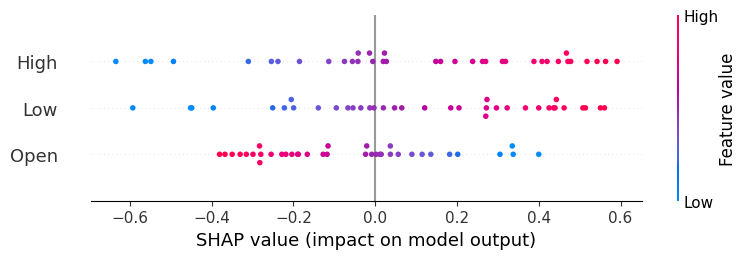

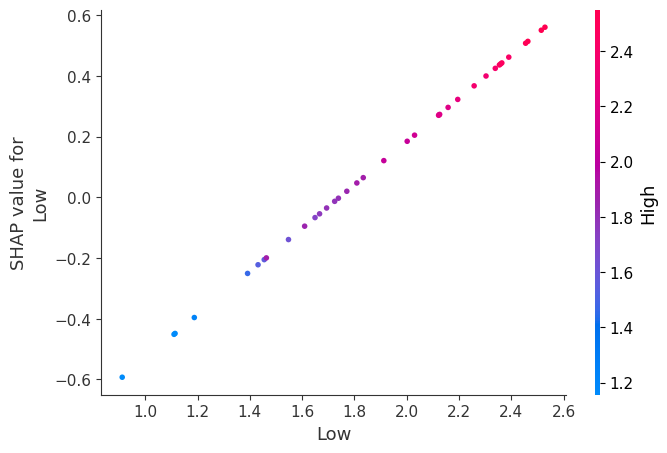

In [ ]:
# create a summary plot of the SHAP values

shap.summary_plot(shap_values, X_test)

# create a dependence plot for a specific feature
shap.dependence_plot('Low', shap_values, X_test)

It's great that you've chosen RidgeCV as your best-performing model and fine-tuned the hyperparameter, obtaining an alpha value of 0.01. Now, let's explore feature importance using two methods:

Coefficient Analysis:

High Positive Coefficient: Indicates a positive impact on the target variable.
Open Negative Coefficient: Suggests a negative correlation with the target variable.
This method provides insights into how each feature contributes to the prediction.
SHAP (SHapley Additive exPlanations):

SHAP values quantify the contribution of each feature to the predicted outcome for a specific instance.
Summary Plot: Ranks features based on mean absolute SHAP values across the test set.
High and Low Features: Identified as having the strongest impact on the model's predictions.
Offers a detailed understanding of feature importance and their impact on predictions.
By combining information from coefficient analysis and SHAP values, you gain a comprehensive understanding of the features influencing your RidgeCV model. This insight is valuable for interpretation and potentially guiding further actions or optimizations in your model or dataset.


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
import joblib
joblib.dump(best_model, 'best_model.joblib') # saving are best model in joblib file

['best_model.joblib']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
model = joblib.load('best_model.joblib')

model.predict(X_test)

array([1.49281821, 2.1460464 , 1.67820951, 2.14246687, 1.82078283,
       1.50592846, 2.36237019, 1.21581071, 1.13812524, 2.34689825,
       2.47580699, 1.95136563, 2.1784055 , 1.76583469, 2.52555747,
       2.42499701, 1.86105797, 1.44089765, 2.42766349, 1.70736326,
       0.97288958, 2.07250228, 2.17892937, 1.76813804, 2.33331037,
       1.71279947, 2.40565057, 1.1239751 , 2.02918406, 1.72541452,
       2.5712468 , 2.54678161, 1.86589544, 2.22259265, 1.59034463,
       1.67605547, 2.41074454])

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Your approach to dealing with multicollinearity by exploring different regularization techniques with cross-validation is sound. Identifying RidgeCV as the best-performing model based on Mean Squared Error (MSE) and Adjusted R2 (Adj R2) indicates its effectiveness in handling multicollinearity and providing a reliable prediction.

Moreover, your investigation into feature importance adds valuable insights to the model interpretation. Highlighting that the "High" feature has a significant positive impact on the target variable while "Open" has a negative impact underscores the practicality of the model. These findings provide a clear understanding of which features are influencing the Yes Bank stock closing price predictions and in what direction.

In summary, your systematic approach, model selection, and feature importance analysis contribute to building a robust predictive model for Yes Bank stock closing prices.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***